In [7]:
import pandas as pd
import numpy as np

## EPH survey data

In [2]:
df = pd.read_csv('./../resumen_EPH_hogar.csv')
df = df.loc[df.IV1 != 9]
df['IV10'] = df['IV10'].map({1: 1, 2: 2, 3: 2, 0: 0, 9: 9})
df['II9'] = df['II9'].map({1: 1, 2: 2, 3: 2, 4: 4, 0: 0})
df['II7'] = df['II7'].map({1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 6, 8: 6, 9: 6, 0: 0})
df['IX_TOT'] = df['IX_TOT'].clip(0, 8)


In [3]:
# df.groupby(['AGLOMERADO']).nunique()

In [4]:
# for col in df.iloc[:, 2:].columns:
#     print col
#     print sorted(df[col].unique())

In [ ]:
pd.read_csv('./../../Datos_censo/Preguntas/merged/')

## 2010 ARG Census data

In [313]:
path = './../../Datos_censo/Preguntas/merged/'

VIVIENDA_V01 = pd.read_csv(path + 'VIVIENDA-V01.csv', encoding = 'latin-1')
HOGAR_H05 = pd.read_csv(path + 'HOGAR-H05.csv', encoding = 'latin-1') # Pisos
HOGAR_H06 = pd.read_csv(path + 'HOGAR-H06.csv', encoding = 'latin-1') # Cubierta techos
HOGAR_H07 = pd.read_csv(path + 'HOGAR-H07.csv', encoding = 'latin-1') # Cielorraso
HOGAR_H08 = pd.read_csv(path + 'HOGAR-H08.csv', encoding = 'latin-1') # Agua
HOGAR_H09 = pd.read_csv(path + 'HOGAR-H09.csv', encoding = 'latin-1') # Procedencia agua
HOGAR_H10 = pd.read_csv(path + 'HOGAR-H10.csv', encoding = 'latin-1') # Tiene baño
HOGAR_H11 = pd.read_csv(path + 'HOGAR-H11.csv', encoding = 'latin-1') # Baño con cadena
HOGAR_H12 = pd.read_csv(path + 'HOGAR-H12.csv', encoding = 'latin-1') # Desague baño
HOGAR_H13 = pd.read_csv(path + 'HOGAR-H13.csv', encoding = 'latin-1') # Baño uso exclusivo
HOGAR_H14 = pd.read_csv(path + 'HOGAR-H14.csv', encoding = 'latin-1') # Combustible cocina
HOGAR_PROP = pd.read_csv(path + 'HOGAR-PROP.csv', encoding = 'latin-1') # Regimen tenencia
HOGAR_TOTPERS = pd.read_csv(path + 'HOGAR-TOTPERS.csv', encoding = 'latin-1') # Personas en hogar

df_list = [VIVIENDA_V01, HOGAR_H05, HOGAR_H06, HOGAR_H07, HOGAR_H08, HOGAR_H09, 
          HOGAR_H10, HOGAR_H11, HOGAR_H12, HOGAR_H13, HOGAR_H14, HOGAR_PROP, HOGAR_TOTPERS]

In [314]:

VIVIENDA_V01['2 Departamento'] = VIVIENDA_V01['4 Departamento']
VIVIENDA_V01['3 Pieza de inquilinato'] = VIVIENDA_V01['5 Pieza en inquilinato']
VIVIENDA_V01[u'4 Pieza en hotel / pension'] = VIVIENDA_V01[u'6 Pieza en hotel familiar o pension']
VIVIENDA_V01[u'5 Local no construido para habitacion'] = VIVIENDA_V01[u'7 Local no construido para habitacion']
VIVIENDA_V01['6 Otros'] = VIVIENDA_V01['2 Rancho'] + VIVIENDA_V01['3 Casilla'] + VIVIENDA_V01[u'8 Vivienda movil'] + VIVIENDA_V01['9 Persona/s viviendo en la calle']

IV1_censo = VIVIENDA_V01[['LINK', 'VIVIENDAS_PARTICULARES', '1 Casa', '2 Departamento', '3 Pieza de inquilinato', u'4 Pieza en hotel / pension',
                         u'5 Local no construido para habitacion', '6 Otros', 'TOTAL']]
IV3_censo = HOGAR_H05[[u'LINK', u'HOGARES', u'1 Ceramica, baldosa, mosaico, marmol, madera o alfombrado',
                       u'2 Cemento o ladrillo fijo',u'3 Tierra o ladrillo suelto',u'4 Otro',u'TOTAL']]

IV3_censo.columns = ['LINK', 'HOGARES', '1 Mosaico / baldosa / madera / ceramica / alfombra', 
                    '2 Cemento / ladrillo fijo', '3 Ladrillo suelto / tierra', '4 Otro', 'TOTAL']

IV4_censo = HOGAR_H06[[u'LINK', u'HOGARES', u'1 Cubierta asfaltica o membrana',
       u'2 Baldosa o losa (sin cubierta)', u'3 Pizarra o teja',
       u'4 Chapa de metal (sin cubierta)', u'5 Chapa fibrocemento o plastico',
       u'6 Chapa de carton', u'7 Cana, palma, tabla o paja con o sin barro',
       u'8 Otro', u'TOTAL']]
    
IV4_censo.columns = ['LINK', 'HOGARES','1 Membrana / cubierta asfaltica', '2 Baldosa / losa sin cubierta', '3 Pizarra / teja', 
                     '4 Chapa de metal sin cubierta', '5 Chapa de fibrocemento / plastico', '6 Chapa de carton', 
                     '7 Caña / tabla / paja con barro / paja sola', '9 N/S. Depto en propiedad horizontal', 'TOTAL']

IV5_censo = HOGAR_H07[[u'LINK',  u'HOGARES', u'1 Si', u'2 No', u'TOTAL']]
IV6_censo = HOGAR_H08[[u'LINK', u'HOGARES', u'1 Por caneria dentro de la vivienda',
       u'2 Fuera de la vivienda pero dentro del terreno', u'3 Fuera del terreno', u'TOTAL']]
IV7_censo = HOGAR_H09[[u'LINK', u'HOGARES', u'1 Red publica', u'2 Perforacion con bomba a motor', u'3 Perforacion con bomba manual',
       u'4 Pozo', u'5 Transporte por cisterna', u'6 Agua de lluvia, rio, canal, arroyo o acequia', u'TOTAL']]
IV7_censo['4 Otra fuente'] = HOGAR_H09['4 Pozo'] + HOGAR_H09['5 Transporte por cisterna'] + \
 HOGAR_H09[u'6 Agua de lluvia, rio, canal, arroyo o acequia']
IV7_censo = IV7_censo[[u'LINK', u'1 Red publica', u'2 Perforacion con bomba a motor',
                      u'3 Perforacion con bomba manual', u'4 Otra fuente', u'TOTAL']]

IV8_censo = HOGAR_H10[[u'LINK', u'HOGARES', u'1 Si', u'2 No', u'TOTAL']]

#Next 3 questions, total is HOGARES with toiled (answered 'Si' on HOGAR_H10)
IV10_censo = HOGAR_H11[[u'LINK', u'HOGARES', u'1 Si', u'2 No', u'TOTAL']]
IV11_censo = HOGAR_H12[[u'LINK', u'HOGARES', u'1 A red publica (cloaca)',u'2 A camara septica y pozo ciego', u'3 Solo a pozo ciego',
       u'4 A hoyo, excavacion en la tierra, etc.', u'TOTAL']]
II9_censo = HOGAR_H13[[u'LINK', u'HOGARES', u'1 Usado solo por este hogar', u'2 Compartido con otros hogares', u'TOTAL']]

II8_censo = HOGAR_H14[[u'LINK', u'HOGARES', u'1 Gas de red', u'2 Gas a granel (zeppelin)',
       u'3 Gas en tubo', u'4 Gas en garrafa', u'5 Electricidad', u'6 Lena o carbon', u'7 Otro', u'TOTAL']]
II8_censo['2 Gas de tubo / garrafa'] = HOGAR_H14['3 Gas en tubo'] + HOGAR_H14['4 Gas en garrafa']
II8_censo[u'3 Kerosene / leña/ carbon'] = HOGAR_H14[u'6 Lena o carbon']
II8_censo['4 Otro'] = HOGAR_H14[u'2 Gas a granel (zeppelin)'] + HOGAR_H14[u'5 Electricidad'] + HOGAR_H14[u'7 Otro']

II8_censo = II8_censo[['LINK', '1 Gas de red', '2 Gas de tubo / garrafa', u'3 Kerosene / leña/ carbon', '4 Otro', 'TOTAL']]

II7_censo = HOGAR_PROP[[u'LINK', u'HOGARES',u'1 Propietario de la vivienda y del terreno',
       u'2 Propietario solo de la vivienda', u'3 Inquilino', u'4 Ocupante por prestamo', u'5 Ocupante por trabajo',
       u'6 Otra situacion', u'TOTAL']]

IX_TOT_censo = HOGAR_TOTPERS[[u'LINK', u'HOGARES', u'1 1', u'2 2', u'3 3', u'4 4', u'5 5', u'6 6',
       u'7 7', u'8 8  y mas', u'TOTAL']]



/home/miglesia/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/miglesia/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/miglesia/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

### Shapefiles aglomerados

In [1]:
import geopandas as gpd
import shapely.geometry as geometry
import pandas as pd

In [2]:
# gdf = gpd.read_file('./../radios_censo_2010_aglos/radios_censo_2010_aglos.shp')
# gdf = gdf.drop('AREA', axis = 1)
# gdf['geometry'] = [geometry.Point(xy) for xy in zip(gdf.X, gdf.Y)]
# gdf.to_file(driver = 'ESRI Shapefile', filename = './aglos_w_centroid.shp')

g1 = gpd.GeoDataFrame.from_file("aglos_w_centroid.shp")
g1['REDCODE'] = g1['REDCODE'].astype(int)
g2 = gpd.GeoDataFrame.from_file("./../../Datos_censo/Radios_censales/radios_w_geometry.shp")
g2['LINK'] = g2['LINK'].astype(int)

merged = g1[['REDCODE','AGLO_EPH', 'geometry']].merge(g2[['LINK', 'PROVINCIA', 'POBLACION_', 'VIVIENDAS_', 'HOGARES', 'geometry']]
                                             , left_on = ['REDCODE'], right_on = ['LINK'], how = 'right')

In [20]:
g1.head()

,OBJECTID,REDCODE,PROV,DPTO,AGLO_CENSO,X,Y,AGLO_EPH,geometry
0,1,380210103,38,38021,0018,-65.478548,-24.085562,0018,POINT (-65.47854776600001 -24.0855616392)
1,2,380210106,38,38021,0018,-65.396999,-24.144535,0018,POINT (-65.3969988529 -24.1445354025)
2,3,380210107,38,38021,0018,-65.402776,-24.123316,0018,POINT (-65.4027764752 -24.1233161208)
3,4,380210109,38,38021,0018,-65.421356,-24.122378,0018,POINT (-65.421356252 -24.1223782352)
4,5,380210307,38,38021,0018,-65.292660,-24.159525,0018,POINT (-65.2926596695 -24.1595247371)


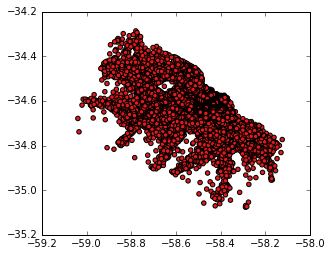

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
g1.loc[g1.AGLO_CENSO == '0001'].plot(column = 'AGLO_CENSO')
plt.show()

In [12]:
correccion_AGLOS = { u'0001': 32, #capital CABA
 u'0002': 13, #cordoba
 u'0003': 4, #rosario
 u'0004': 10, #mendoza
 u'0005': 2, #la plata
 u'0006': 29, #tucuman
 u'0007': 34, #mar del plata
 u'0008': 5, #sta fe
 u'0009': 23,# salta
 u'0010': 27,# san juan
 u'0011': 8,# resistencia
 u'0012': 18, #sgo del estero
 u'0013': 12, #corrientes
 u'0014': 3,# bahia blanca
 u'0015': 17, #neuquen
 u'0016': 6, #parana
 u'0017': 7, #posadas
 u'0018': 19, #jujuy
 u'0019': 15, #formosa
 u'0020': 36, #rio cuarto
 u'0021': 22, #catamarca
 u'0022': 9, #cdro rivadavia
 u'0023': 14, #concordia
 u'0024': 38, #san nicolas
 u'0025': 26, #san luis
 u'0026': 25, #la rioja
 u'0029': 30, #santa rosa
 u'0044': 20, # Rio gallegos
 u'0050': 93, #Viedma (patagones ? )
 u'0086': 31, #Ushuaia rio grande
 u'0135': 91, #Rawson - trelew
 u'1000': 33 }#  GBA
merged['AGLOMERADO'] = merged['AGLO_EPH'].map(correccion_AGLOS)
merged.columns = pd.MultiIndex.from_product([['Info'], merged.columns])

In [29]:
# Save aglos reference
merged['Info'].drop(['geometry_x', 'geometry_y'], axis = 1).drop_duplicates().to_csv('./../../EPH/radios_aglos_ref.csv', index = False, encoding = 'utf-8')

In [324]:
#Poblacion de aglomerados
merged.groupby(('Info', 'AGLOMERADO')).sum()

Info                                       \
                          REDCODE           LINK POBLACION_ VIVIENDAS_   
(Info, AGLOMERADO)                                                       
2                     62931600102    62931600102     787894     249041   
3                     21620438795    21620438795     291741      98935   
4                   1074524586648  1074524586648    1219131     361336   
5                    389800112816   389800112816     473283     138471   
6                    101684251594   101684251594     264149      76916   
7                    162624637852   162624637852     293505      79750   
8                     94317015058    94317015058     385726     101319   
9                     50220765385    50220765385     161680      45702   
10                   507343757596   507343757596     935691     249518   
12                    54964392812    54964392812     347057      83994   
13                   230269628881   230269628881    1456396     418532   
15                    77892332254    77892332254     222309      52993   
17                   235546495320   235546495320     333691      99407   
18                   283089163061   283089163061     360923      86898   
19                   111791234641   111791234641     310623      73132   
20                   238744617408   238744617408     287388      81831   
22                    16999688140    16999688140     173891      41693   
23                   355359254276   355359254276     701940     162927   
25                    65800123507    65800123507     177807      44836   
26                   145890514298   145890514298     182414      47163   
27                   283721735937   283721735937     413426     101087   
29                   682816715295   682816715295     814235     190944   
30                    70198964323    70198964323     114629      37156   
31                  3586632718710  3586632718710    3276369     971108   
32                    71348869557    71348869557    2888938    1082563   
33                   635211919362   635211919362   10646488    2835707   
34                    54228837587    54228837587     603448     197018   
36                    25940686549    25940686549     162695      51641   
38                    42617686899    42617686899     181810      52224   
91                    35464841308    35464841308     122322      36243   
93                    47535773643    47535773643      73322      22594   

                             
                    HOGARES  
(Info, AGLOMERADO)           
2                    262820  
3                    102131  
4                    400487  
5                    149586  
6                     81657  
7                     84957  
8                    108706  
9                     49446  
10                   271046  
12                    94255  
13                   450772  
15                    59245  
17                   106310  
18                    92594  
19                    82246  
20                    86664  
22                    45466  
23                   183444  
25                    47962  
26                    52220  
27                   110997  
29                   212794  
30                    38335  
31                  1008552  
32                  1149692  
33                  3132773  
34                   205628  
36                    53456  
38                    55767  
91                    37978  
93                    23555

In [203]:
VIEDMA = merged.loc[merged.AGLOMERADO == 93][['LINK']]

## Ajuste de los radios censales de un aglomerado

In [325]:
from IPython.display import display, HTML

# VIEDMA['radio'] = VIEDMA['radio'].astype(int)
# IV3_censo['radio'] = IV3_censo['radio'].astype(int)

i = 0
for df in [IV3_censo, IV4_censo, IV5_censo, IV6_censo,
           IV7_censo, IV8_censo, II8_censo, II7_censo, IX_TOT_censo]:   
#     df.iloc[:, 1:-1] = df.iloc[:, 1:-1].div(df['TOTAL'], axis = 0)
    name = ['Pisos', 'Cubierta techo', 'Cielorraso', 'Agua', 'Procedencia agua', 'Tiene baño', 'Combustible cocina',
           'Regimen tenencia', 'Personas en hogar'][i]
    df.columns = pd.MultiIndex.from_product([[name], df.columns])
    i += 1

In [326]:
merged_result = merged.iloc[:, 3:].rename(columns = {('Info','geometry_x'): ('Info','geometry')}
        ).merge(IV3_censo.iloc[:, :-1], left_on = [('Info', 'LINK')], right_on = [('Pisos', 'LINK')], how = 'left'
#                 ).merge(IV4_censo.iloc[:, :-1], left_on = [('Info', 'LINK')], right_on = [('Cubierta techo', 'LINK')], how = 'left'
                       ).merge(IV5_censo.iloc[:, :-1], left_on = [('Info', 'LINK')], right_on = [('Cielorraso', 'LINK')], how = 'left'
                              ).merge(IV6_censo.iloc[:, :-1], left_on = [('Info', 'LINK')], right_on = [('Agua', 'LINK')], how = 'left'
                                     ).merge(IV7_censo.iloc[:, :-1], left_on = [('Info', 'LINK')], right_on = [('Procedencia agua', 'LINK')], how = 'left'
                                          ).merge(IV8_censo.iloc[:, :-1], left_on = [('Info', 'LINK')], right_on = [('Tiene baño', 'LINK')], how = 'left'
                ).merge(II8_censo.iloc[:, :-1], left_on = [('Info', 'LINK')], right_on = [('Combustible cocina', 'LINK')], how = 'left'
                       ).merge(II7_censo.iloc[:, :-1], left_on = [('Info', 'LINK')], right_on = [('Regimen tenencia', 'LINK')], how = 'left'
                              ).merge(IX_TOT_censo.iloc[:, :-1], left_on = [('Info', 'LINK')], right_on = [('Personas en hogar', 'LINK')], how = 'left')


In [327]:
# merged_result.to_csv('hogares_aglomerados.csv', index = False, encoding  ='utf-8')
merged_result.to_csv('hogares_aglomerados_counts.csv', index = False, encoding  ='utf-8')

# Done
# ____

In [240]:
tuple(range(5 - 1, 0, -1))

(4, 3, 2, 1)

In [278]:
info_dfs = [IV1_censo, IV3_censo, IV4_censo, IV5_censo, IV6_censo]
T = len(info_dfs)

qjkl = df.groupby(['IV1', 'IV3', 'IV4', 'IV5', 'IV6'])[['CODUSU']].nunique() # how many IDs with each combination
qjkl /= qjkl.sum()

q_ix = pd.MultiIndex.from_product(qjkl.index.levels, names=qjkl.index.names)
qjkl = qjkl.reindex(q_ix, fill_value = 0)


qjkl = qjkl.unstack(tuple(range(T - 1, 0, -1))).sort_index(axis = 1)

margins_s = []
margins_v = []
shape_ = np.zeros(T, dtype = int)

for t in range(T):
    margin_series = (info_dfs[t].iloc[:, 1:-1].sum()/info_dfs[t].TOTAL.sum())
    margins_s += [margin_series]
    margins_v += [margin_series.values]
    shape_[t] = len(margin_series)
    
a, b, c, d, e = tuple([m.values for m in margins_s])
df_ = pd.DataFrame(np.prod(np.ix_(a, b, c, d, e)).reshape(qjkl.values.shape), 
                  columns = qjkl.columns, index = qjkl.index)
uncorr_fill_p = df_

uncorr_fill_q = df_ * (qjkl == 0).astype(int)
qjkl = (1 - uncorr_fill_q.sum().sum())*qjkl + uncorr_fill_q

In [279]:
qjkl

CODUSU                                                              \
IV6         1                                                               
IV5         1                                                               
IV4         1                                       2                       
IV3         1         2         3         4         1         2         3   
IV1                                                                         
1    0.139825  0.005215  0.000366  0.000293  0.099717  0.007869  0.000063   
2    0.035374  0.000805  0.000063  0.000167  0.033546  0.000899  0.028428   
3    0.000449  0.000115  0.000031  0.000165  0.000314  0.000031  0.000736   
4    0.000303  0.000073  0.000021  0.000055  0.000251  0.000042  0.000248   
5    0.000021  0.000012  0.000003  0.000045  0.000042  0.000001  0.000200   
6    0.000052  0.000312  0.000074  0.001139  0.000052  0.000010  0.005094   

                                       ...                                   \
IV6                                    ...                  3                 
IV5                                    ...                  2                 
IV4                   3                ...                  6                 
IV3         4         1         2      ...                  3             4   
IV1                                    ...                                    
1    0.000188  0.043202  0.001066      ...       3.135094e-05  1.540872e-05   
2    0.000094  0.003877  0.000052      ...       2.476574e-07  3.795164e-06   
3    0.000077  0.000021  0.000010      ...       6.415536e-09  9.831328e-08   
4    0.000026  0.000010  0.000094      ...       2.158741e-09  3.308108e-08   
5    0.000021  0.000005  0.000076      ...       1.739054e-09  2.664970e-08   
6    0.000532  0.000127  0.001942      ...       4.437840e-08  6.800656e-07   

                                                                           \
IV6                                                                         
IV5                                                                         
IV4             7                                                       9   
IV3             1             2             3             4             1   
IV1                                                                         
1    1.609537e-06  3.834176e-07  1.045031e-05  2.767866e-06  6.593503e-07   
2    3.964284e-07  9.443563e-08  6.526415e-06  6.817245e-07  1.623978e-07   
3    1.026943e-08  2.446344e-09  1.690660e-07  1.765999e-08  4.206895e-09   
4    3.455524e-09  8.231615e-10  5.688842e-08  5.942347e-09  1.415563e-09   
5    2.783726e-09  6.631284e-10  4.582858e-08  4.787079e-09  1.140359e-09   
6    7.103706e-08  1.692217e-08  1.045031e-05  1.221600e-07  2.910049e-08   

                                               
IV6                                            
IV5                                            
IV4                                            
IV3             2             3             4  
IV1                                            
1    1.010405e-05  1.055430e-06  2.514205e-07  
2    2.488624e-06  2.599522e-07  6.192480e-08  
3    6.446751e-08  6.734031e-09  1.604155e-09  
4    2.169244e-08  2.265910e-09  5.397762e-10  
5    1.747515e-08  1.825388e-09  4.348368e-10  
6    4.459432e-07  4.658153e-08  1.109647e-08  

[6 rows x 192 columns]

### Lagrangian approach

In [ ]:
# def L(x, q_mat, margins):
#     shape = np.array(q_mat.shape)
#     len_a = shape.sum()
#     p_mat = np.array(x[:-len_a]).reshape(shape)
#     a = np.array(x[-len_a:])
    
#     if np.random.rand() < 0.0001:
#         print p_mat
#         print a

#     MaxEnt = (p_mat*np.log(p_mat/q_mat))
    
#     a_ix = np.insert(shape.cumsum(), [0], 0)
    
#     lambda_terms = np.zeros(len(shape))
#     for dim in range(len(shape)):
#         lambda_terms[dim] = np.dot(a[a_ix[dim]:a_ix[dim + 1]], 
#                                    margins[dim].values - p_mat.sum(axis = tuple([i for i in range(len(shape)) if i != dim])))

#     return MaxEnt.sum() + lambda_terms.sum()